# Project 4: Can you predict that?

### Details
#### The state of Colorado has a large portion of their residential dwelling data that is  missing the year built and this document has a prediction model that can classify if a house is built pre 1980. It also predicts (regression) the actual age of each home.


In [192]:
import pandas as pd
import altair as alt
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [193]:
# Load modules
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [185]:
# load data
dwellings_denver = pd.read_csv("https://github.com/byuidatascience/data4dwellings/raw/master/data-raw/dwellings_denver/dwellings_denver.csv")
dwellings_ml = pd.read_csv("https://github.com/byuidatascience/data4dwellings/raw/master/data-raw/dwellings_ml/dwellings_ml.csv")
dwellings_neighborhoods_ml = pd.read_csv("https://github.com/byuidatascience/data4dwellings/raw/master/data-raw/dwellings_neighborhoods_ml/dwellings_neighborhoods_ml.csv")   

# alt.data_transformers.enable('json') Altair no longer supports JSON
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

## GRAND QUESTION 1
### Create 2-3 charts that evaluate potential relationships between the home variables and before 1980

Price is affected  by living area

In [196]:
chart = (alt.Chart(dwellings_denver, title="Selling Price vs Square Feet")
    .encode(
        alt.X("livearea:Q", title = "Sqf per area"),
        alt.Y('sprice:Q',title="Selling Price")
    )
    .mark_point().properties(width=400,height=350)
)
chart.save('sqf.png')

Second Chart: Selling Price vs Deduction

In [197]:
chart = (alt.Chart(dwellings_denver, title="Selling Price vs Deduction")
    .encode(
        alt.X("sprice:Q", title = "Selling price"),
        alt.Y('deduct:Q',title="Deduction from the selling price")
    )
    .mark_bar().properties(width=400,height=350)
)
chart.save("price.png")

2 bedroom houses are most commonly sold followed by 3 bedroom

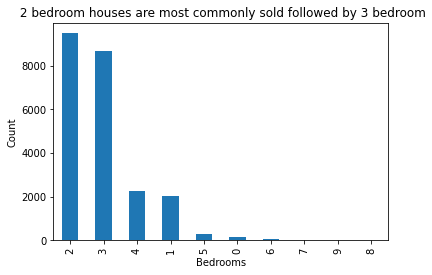

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [201]:
dwellings_denver['numbdrm'].value_counts().plot(kind='bar')
plt.title(' 2 bedroom houses are most commonly sold followed by 3 bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.savefig('bedroom.png', bbox_inches='tight')
plt.show()
sns.despine


## GRAND QUESTION 2
### Can you build a classification model (before or after 1980) that has at least 90% accuracy for the state of Colorado to use (explain your model choice and which models you tried)?

Yes, I can build a clasiffication model that reaches 90% accuracy. I tried using other models but this is the only one I got working. I found that decision trees are easy to interpret and visualize.  It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.

In [202]:
# Removes the target and keeps all features
#split dataset in features and target variable

X_pred = dwellings_ml.drop(dwellings_ml.filter(regex = 'before1980|yrbuilt|parcel').columns, axis = 1)
# Selects the target column
y_pred = dwellings_ml.filter(regex = "before1980")
# Splitting X and y variables into train and test sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(
    X_pred, y_pred, test_size = .34, random_state = 76)  

# clf stands for classifier model.
clf = tree.DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)
#  Using the features in the test set to make predictions
y_pred = clf.predict(X_test)
y_probs = clf.predict_proba(X_test)

## GRAND QUESTION 3
### Will you justify your classification model by detailing the most important features in your model (a chart and a description are a must)?

_The most important feature is "arcstyle" also known as the type of home_

In [210]:
df_features = pd.DataFrame(
    {'f_names': X_train.columns, 
    'f_values': clf.feature_importances_}).sort_values('f_values', ascending = False)

<AxesSubplot:title={'center':'Feature Importance Ranking'}, xlabel='f_names'>

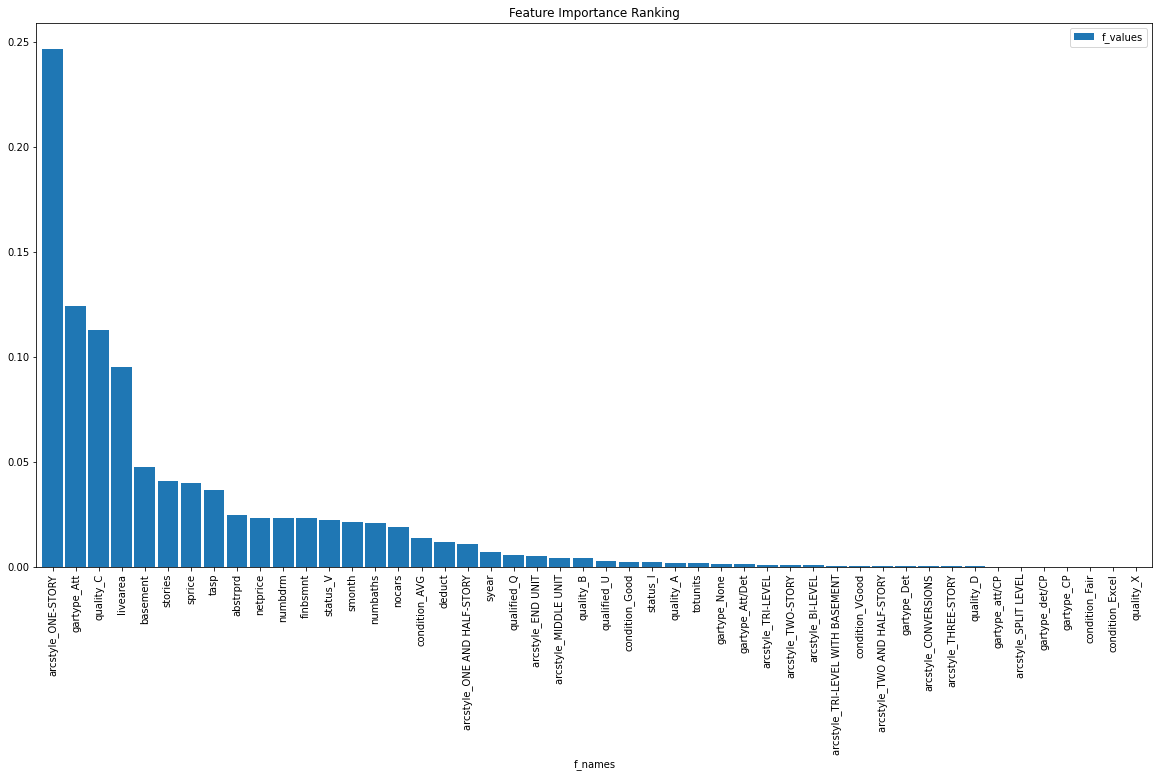

In [221]:
df_features.plot.bar(x='f_names', y='f_values', rot=90, width=.9,figsize=(20,10), title="Feature Importance Ranking")


## GRAND QUESTION 4
### Can you describe the quality of your classification model using 2-3 evaluation metrics? You need to provide an interpretation of each evaluation metric when you provide the value.


In [205]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9050186112180721


In [223]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      2982
           1       0.91      0.93      0.92      4809

    accuracy                           0.91      7791
   macro avg       0.90      0.90      0.90      7791
weighted avg       0.90      0.91      0.90      7791



In [224]:
print(metrics.precision_score(y_pred, y_test))

0.9146117790910944


In [225]:
print(metrics.roc_auc_score(y_pred, y_test))


0.8963702154704061


In [ ]:
(y_pred, y_test)